### 聚类与降维原理与实践

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
X = pd.read_csv('E:/do you learn/MLdata/telecom.csv',encoding='utf-8')

In [3]:
print(X.shape)

(30000, 7)


In [4]:
X.head()

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0


In [5]:
#数据标准化
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled[0:5]

array([[-0.32484896,  1.63037135, -0.14052452,  2.08138717, -0.5953273 ,
        -0.2199407 , -0.31623138],
       [-0.24388972, -0.29646995, -0.46276181, -0.68654465, -0.62960238,
        -0.18990475,  0.39196072],
       [-0.28436934,  1.63037135, -0.46276181, -0.72249182, -0.62960238,
        -0.2199407 , -0.31623138],
       [-0.6082063 ,  1.63037135, -0.46276181, -0.72249182, -0.49298724,
        -0.2199407 , -0.31623138],
       [ 0.97049891, -0.29646995, -0.46276181, -0.69373409, -0.62960238,
        -0.2199407 , -0.31623138]])

In [6]:
#进行PCA数据降维
from sklearn.decomposition import PCA
#生成PCA实例
pca = PCA(n_components = 3)
#进行PCA降维
X_pca = pca.fit_transform(X_scaled)
#生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca, columns = ['pca_1','pca_2','pca_3'])
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,1.549988,-0.211833,-1.038576
1,-1.034264,0.257341,-0.385973
2,-0.244564,-0.431907,-1.222455
3,-0.151285,-0.400462,-1.430211
4,-1.163608,-0.439145,0.526530


In [7]:
#训练简单模型
from sklearn.cluster import KMeans 
#kmeans算法实例化
est = KMeans(n_clusters=10)
est.fit(X_pca_frame)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
#取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_,columns = ['cluster'])
#生成有聚类后dataframe
X_pca_frame = pd.concat([X_pca_frame,kmeans_clustering_labels],axis =1)
X_pca_frame.head()

,pca_1,pca_2,pca_3,cluster
0,1.549988,-0.211833,-1.038576,1
1,-1.034264,0.257341,-0.385973,0
2,-0.244564,-0.431907,-1.222455,7
3,-0.151285,-0.400462,-1.430211,7
4,-1.163608,-0.439145,0.526530,6


In [9]:
#对不同K值进行计算，筛选最优的K值
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

calinski_harabaz_score with k=2 is 4910.003496472364
calinski_harabaz_score with k=3 is 4060.160903496289
calinski_harabaz_score with k=4 is 4209.130318954055
calinski_harabaz_score with k=5 is 3846.8083762141905
calinski_harabaz_score with k=6 is 5105.763242645713
calinski_harabaz_score with k=7 is 3071.606883314248
calinski_harabaz_score with k=8 is 2763.7406920578705
calinski_harabaz_score with k=9 is 37048.13507383297
calinski_harabaz_score with k=10 is 39264.16998501312
calinski_harabaz_score with k=11 is 20516.5296873296
calinski_harabaz_score with k=12 is 9611.7179800408
calinski_harabaz_score with k=13 is 8822.569731869431


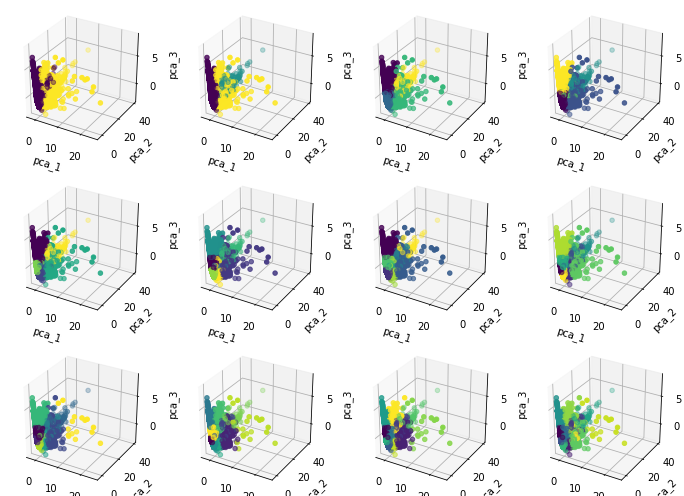

In [10]:
#KMeans算法实例化 
d = {}
fig_reduced_data = plt.figure(figsize = (12,12))
for k in range(2,14):
    est = KMeans(n_clusters=k, random_state=111)
    y_pred = est.fit_predict(X_pca)
    #评估不同K值聚类算法效果
    calinski_harabaz_score = metrics.calinski_harabaz_score(X_pca_frame,y_pred)
    d.update({k:calinski_harabaz_score})
    print('calinski_harabaz_score with k={0} is {1}'.format(k,calinski_harabaz_score))
    
    ax = plt.subplot(4,3,k-1,projection = '3d')
    ax.scatter(X_pca_frame.pca_1,X_pca_frame.pca_2,X_pca_frame.pca_3, c = y_pred)
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')    
    ax.set_zlabel('pca_3')    

Text(0, 0.5, 'calinski_harabaz_score')

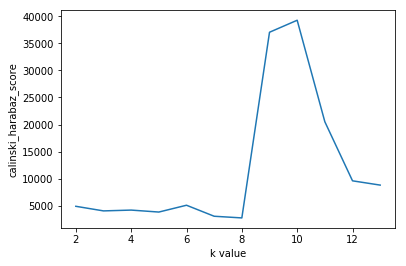

In [11]:
#绘制不同k值对应的score ,找到最优的K值
x = []
y = []
for k ,score in d.items():
    x.append(k)
    y.append(score)

plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('calinski_harabaz_score')

In [14]:
#去除异常数据样本
X.index = X_pca_frame.index
#合并原数据和三个主成分的数据
X_full = pd.concat([X,X_pca_frame],axis =1)
X_full.head()

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数,pca_1,pca_2,pca_3,cluster
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0,1.549988,-0.211833,-1.038576,1
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0,-1.034264,0.257341,-0.385973,0
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0,-0.244564,-0.431907,-1.222455,7
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0,-0.151285,-0.400462,-1.430211,7
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0,-1.163608,-0.439145,0.526530,6


In [16]:
#按每个聚类分组
grouped = X_full.groupby('cluster')
result_data = pd.DataFrame()
#对分组做循环，分别对每组进行去除异常值处理
for name, group in grouped:
    print('Group:{0}, Samples before:{1}'.format(name, group['pca_1'].count()))
    desp = group[['pca_1','pca_2','pca_3']].describe()
    for att in ['pca_1','pca_2','pca_3']:
        lower25 = desp.loc['25%',att]
        upper75 = desp.loc['75%',att]
        IQR = upper75 - lower25
        min_value = lower25 -1.5*IQR
        max_value = upper75 + 1.5*IQR
        group = group[(group[att]>min_value)&(group[att]<max_value)]
    result_data = pd.concat([result_data, group],axis = 0)
    
    print('Group:{0},Samples after:{1}'.format(name,group['pca_1'].count()))

print('Remain sample:',result_data['pca_1'].count())

Group:0, Samples before:11019
Group:0,Samples after:9428
Group:1, Samples before:2892
Group:1,Samples after:2217
Group:2, Samples before:369
Group:2,Samples after:297
Group:3, Samples before:1374
Group:3,Samples after:1261
Group:4, Samples before:2023
Group:4,Samples after:1500
Group:5, Samples before:1946
Group:5,Samples after:1606
Group:6, Samples before:6706
Group:6,Samples after:5934
Group:7, Samples before:3603
Group:7,Samples after:2808
Group:8, Samples before:47
Group:8,Samples after:30
Group:9, Samples before:21
Group:9,Samples after:20
Remain sample: 25101


In [24]:
grouped['pca_1'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,11019.0,-0.897237,0.277602,-1.531603,-1.086847,-0.980792,-0.783998,0.353179
1,2892.0,2.071815,0.613688,0.721081,1.531803,2.082647,2.587888,3.357212
2,369.0,0.130412,1.415525,-1.196165,-0.655300,-0.528785,0.338870,5.864293
3,1374.0,-0.452472,1.267484,-2.107839,-1.473223,-0.927109,0.414426,4.920571
4,2023.0,4.039983,0.863998,2.387067,3.435610,3.855102,4.430218,9.719825
5,1946.0,-0.728191,0.507415,-1.607179,-0.998246,-0.821131,-0.729720,2.820760
6,6706.0,-0.388718,0.618651,-1.623047,-0.885978,-0.453119,0.031694,1.623608
7,3603.0,-0.036441,0.346489,-0.807836,-0.193206,-0.188661,0.085660,1.253958
8,47.0,2.969994,1.780627,-0.996370,2.909627,3.229842,3.813195,6.421249


Text(0.5, 0, 'Component_3')

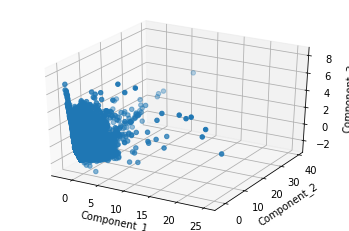

In [25]:
#原始数据降维后的可视化
from mpl_toolkits.mplot3d import Axes3D

#生成三维图形，每个样本点的坐标分别是三个主成分的值
fig_reduced_data = plt.figure()
ax_reduced_data = plt.subplot(111, projection = '3d')
ax_reduced_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,X_pca_frame.pca_3.values)
ax_reduced_data.set_xlabel("Component_1")
ax_reduced_data.set_ylabel("Component_2")
ax_reduced_data.set_zlabel("Component_3")

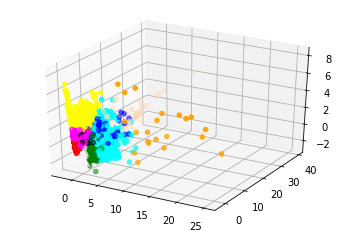

In [26]:
#聚类算法之后的不同簇数据的可视化
#设置每个簇对应的颜色
cluster_2_color = {0:'red',1:'green',2:'blue',3:'yellow',4:'cyan',5:'black',6:'magenta',7:'#fff0f5',
                   8:'#ffdab9',9:'#ffa500'}
colors_clustered_data = X_pca_frame.cluster.map(cluster_2_color)
fig_clustered_data = plt.figure()
ax_clustered_data = plt.subplot(111, projection = '3d')

#聚类算法之后的不同簇数据的映射为不同颜色
ax_clustered_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,X_pca_frame.pca_3.values,
                          c=colors_clustered_data)


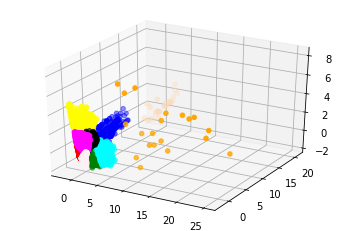

In [28]:
#筛选后的数据聚类可视化
colors_filtered_data = result_data.cluster.map(cluster_2_color)
fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter(result_data.pca_1.values,result_data.pca_2.values,result_data.pca_3.values,c = colors_filtered_data)

#### 用户分析

In [29]:
#1、查看各族中的每月话费情况
monthly_Fare = result_data.groupby('cluster').describe().loc[:,u'每月话费']
monthly_Fare

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,9428.0,23.154542,34.955755,-0.001667,0.000000,4.000000,41.106250,176.666667
1,2217.0,311.170740,134.143904,0.000000,290.000000,390.000000,392.000000,589.000000
2,297.0,101.299590,42.357029,40.000000,89.000000,89.000000,129.000000,406.333333
3,1261.0,71.015726,87.804065,0.000000,4.243333,22.083333,118.291667,687.673333
4,1500.0,396.649543,47.522349,10.948333,390.012500,396.546667,408.476667,620.083333
5,1606.0,79.110901,21.808574,0.000000,60.000000,89.000000,90.000000,240.000000
6,5934.0,62.658810,52.757080,0.000000,11.117500,59.285833,95.264167,534.320000
7,2808.0,2.802324,15.823667,0.000000,0.000000,0.000000,0.000000,200.045000
8,30.0,403.396111,35.766471,389.000000,389.000000,391.000000,394.750000,532.000000


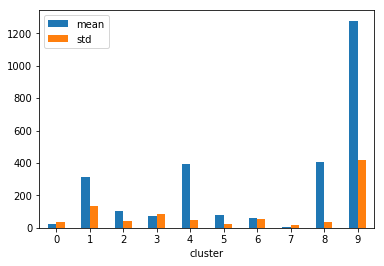

In [30]:
monthly_Fare[['mean','std']].plot(kind='bar', rot=0, legend = True)

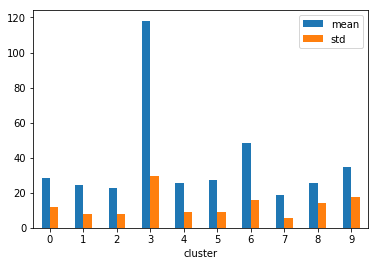

In [32]:
access_time = result_data.groupby('cluster').describe().loc[:,u'入网时间']
access_time[['mean','std']].plot(kind='bar', rot=0, legend = True)

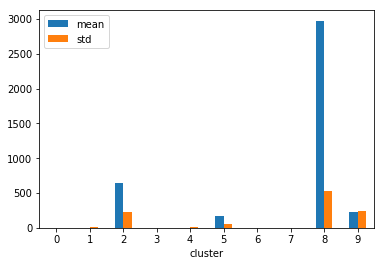

In [33]:
 #3.查看各族中的欠费金额情况
arrearange = result_data.groupby('cluster').describe().loc[:,u'欠费金额']
arrearange[['mean','std']].plot(kind='bar', rot=0, legend = True)

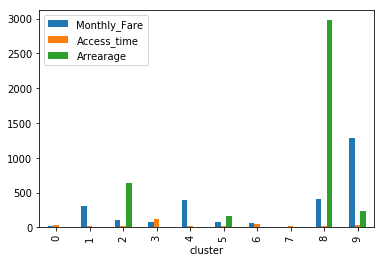

In [36]:
#综合描述
new_column = ['Access_time',u'套餐价格',u'每月流量','Monthly_Fare',u'每月通话时长',
             'Arrearage',u'欠费月份数',u'pca_1',u'pca_2',u'pca_3',u'cluster']
result_data.columns = new_column
result_data.groupby('cluster')[['Monthly_Fare','Access_time','Arrearage']].mean().plot(kind='bar')

### 第三章 推荐算法原理与实践

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from lightfm.datasets import fetch_movielens
from lightfm import LightFM
%matplotlib inline

In [2]:
data = fetch_movielens(min_rating=4.0)

In [5]:
for key, value in data.items():
    print(key, type(value), value.shape)

item_feature_labels <class 'numpy.ndarray'> (1682,)
item_features <class 'scipy.sparse.csr.csr_matrix'> (1682, 1682)
item_labels <class 'numpy.ndarray'> (1682,)
train <class 'scipy.sparse.coo.coo_matrix'> (943, 1682)
test <class 'scipy.sparse.coo.coo_matrix'> (943, 1682)


In [20]:
data['train'].todense()

matrix([[5, 0, 4, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [5, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 5, 0, ..., 0, 0, 0]])

In [11]:
data["item_labels"][:10]

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)',
       'Get Shorty (1995)', 'Copycat (1995)',
       'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
       'Twelve Monkeys (1995)', 'Babe (1995)', 'Dead Man Walking (1995)',
       'Richard III (1995)'], dtype=object)

In [22]:
#数据探索
#1、转换数据格式
train_df = pd.DataFrame(data['train'].todense(),columns = data['item_labels'])
train_df = train_df.transpose()
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
Toy Story (1995),5,4,0,0,0,4,0,0,0,4,...,0,0,4,0,4,0,0,5,0,0
GoldenEye (1995),0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
Four Rooms (1995),4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
Get Shorty (1995),0,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'count of item')

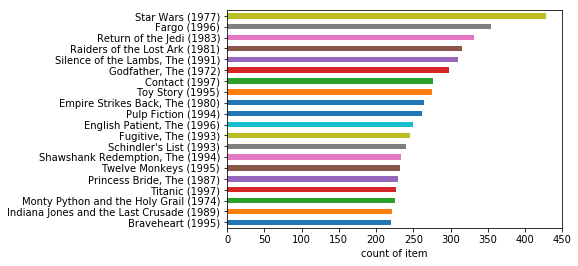

In [34]:
def count_label(x):
    if x>0:
        return True
    else:
        return False
    
item_count = train_df.applymap(count_label).sum(axis =1)  #列求和
item_count.sort_values(ascending = False)[0:20][::-1].plot.barh()
plt.xlabel('count of item')

In [35]:
#训练推荐算法
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

In [36]:
train = data['train']
test = data['test']

In [40]:
#用loss function = bpr 训练模型
model = LightFM(learning_rate = 0.05, loss='bpr')
model.fit(train, epochs = 10)

train_precision = precision_at_k(model, train, k=10).mean()
test_precision = precision_at_k(model, test, k=10).mean()

train_auc = auc_score(model, train).mean()
test_auc = auc_score(model, test).mean()

print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

Precision: train 0.50, test 0.07.
AUC: train 0.89, test 0.85.


In [41]:
#用loss function = warp 训练模型
model = LightFM(learning_rate = 0.05, loss='warp')
model.fit_partial(train, epochs = 10)

train_precision = precision_at_k(model, train, k=10).mean()
test_precision = precision_at_k(model, test, k=10).mean()

train_auc = auc_score(model, train).mean()
test_auc = auc_score(model, test).mean()

print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

Precision: train 0.49, test 0.08.
AUC: train 0.94, test 0.91.


In [42]:
#选择更优模型重新训练模型
model = LightFM(loss = 'warp')
model.fit(data["train"],epochs =30, num_threads=2)

In [54]:
#为用户推荐电影
def sample_recommdation(model, data, user_ids):
    n_users, n_movies = data['train'].shape
    for user_id in user_ids:
        known_positive = data["item_labels"][data["train"].tocsr()[user_id].indices]
        scores = model.predict(user_id, np.arange(n_movies))
        top_movies = data["item_labels"][np.argsort(-scores)]
        print("User %s" % user_id)
        
        print(" Known positives:")
        for x in known_positive[0:3]:
            print("     %s" %x)
        print(" Top movies:")
        for x in top_movies[0:3]:
            print("     %s"%x)

In [81]:
-model.predict(0, np.arange(1682))

array([3.03471375, 5.74500275, 4.94301271, ..., 7.99168587, 8.01550865,
       7.96675682])

In [82]:
np.argsort(-model.predict(0, np.arange(1682)))

array([  49,   55,   99, ...,  109,  892, 1036], dtype=int64)

In [83]:
data["item_labels"][np.argsort(-model.predict(0, np.arange(1682)))]

array(['Star Wars (1977)', 'Pulp Fiction (1994)', 'Fargo (1996)', ...,
       'Operation Dumbo Drop (1995)', 'For Richer or Poorer (1997)',
       'Grease 2 (1982)'], dtype=object)

In [78]:
sample_recommdation(model, data,[0,10,450])

User 0
 Known positives:
     Toy Story (1995)
     Four Rooms (1995)
     Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
 Top movies:
     Star Wars (1977)
     Pulp Fiction (1994)
     Fargo (1996)
User 10
 Known positives:
     Babe (1995)
     Dead Man Walking (1995)
     Mr. Holland's Opus (1995)
 Top movies:
     Star Wars (1977)
     Sense and Sensibility (1995)
     Return of the Jedi (1983)
User 450
 Known positives:
     Contact (1997)
     George of the Jungle (1997)
     Event Horizon (1997)
 Top movies:
     Air Force One (1997)
     Devil's Advocate, The (1997)
     Conspiracy Theory (1997)


### 第4章 集成算法理论与实践

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
#读取数据集
data = pd.read_csv(r'E:/do you learn/MLdata/data_carrier_svm.csv',encoding='utf-8')
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


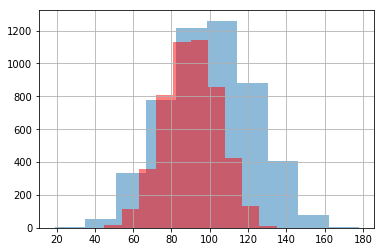

In [3]:
#数据探索
#不同用户的主叫时长分布情况对比
cond = data['是否潜在合约用户']==1
data[cond]['主叫时长（分）'].hist(alpha=0.5, label='潜在合约用户')
data[~cond]['主叫时长（分）'].hist(alpha=0.5, color = 'r',label='非潜在合约用户')

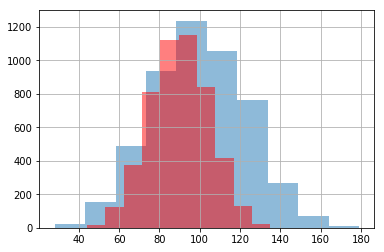

In [4]:
#数据探索
#不同用户的被叫时长分布情况对比
cond = data['是否潜在合约用户']==1
data[cond]['被叫时长（分）'].hist(alpha=0.5, label='潜在合约用户')
data[~cond]['被叫时长（分）'].hist(alpha=0.5, color = 'r',label='非潜在合约用户')

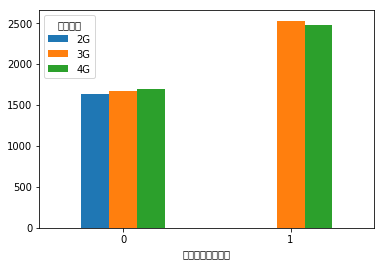

In [5]:
#数据探索
#不同用户的业务类型情况对比
grouped = data.groupby(['是否潜在合约用户','业务类型'])['用户标识'].count().unstack()
grouped.plot(kind = 'bar', alpha = 1.0,rot =0)

In [6]:
#统计各类数据的数量
data['是否潜在合约用户'].value_counts()

1    5003
0    4997
Name: 是否潜在合约用户, dtype: int64

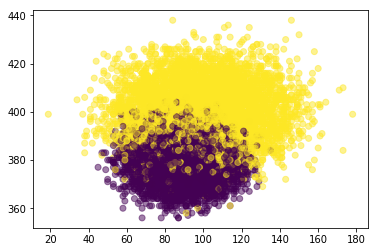

In [7]:
#不同类型可视化
y = data.loc[:,'是否潜在合约用户']
plt.scatter(data.loc[:,'主叫时长（分）'],data.loc[:,'免费流量'],c=y, alpha=0.5)

In [8]:
#数据预处理
#分割特征数据集和便签数据集
X = data.loc[:,'业务类型':'余额']
y = data.loc[:,'是否潜在合约用户']
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


In [9]:
X.head()

,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额
0,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0
1,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0
2,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0
3,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0
4,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0


In [10]:
#类别特征编码
#自定义转换函数
def service_mapping(cell):
    if cell=='2G':
        return 2
    elif cell == '3G':
        return 3
    elif cell == '4G':
        return 4
    
#将业务类型的string型值映射为整数型
service_map = X['业务类型'].map(service_mapping)
service = pd.DataFrame(service_map)

#使用OneHotEncoder转化类型特征为0/1编码的多维特征
enc = OneHotEncoder()
service_enc = enc.fit_transform(service).toarray()
service_enc[:16]

d:\python3.5\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
service.head()

,业务类型
0,3
1,3
2,3
3,4
4,4


In [12]:
#0/1编码的多维特征的名称
service_names = enc.active_features_.tolist()
service_newname = [str(x) + 'G' for x in service_names]

service_df = pd.DataFrame(service_enc, columns = service_newname)
service_df.head()

d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


,2G,3G,4G
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [13]:
service_names

[2, 3, 4]

In [14]:
X_enc = pd.concat([X, service_df],axis =1).drop('业务类型',axis=1)
X_enc.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,1.0,0.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0.0,1.0,0.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,1.0,0.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,0.0,1.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,0.0,1.0


In [15]:
#分割数据集
#将数据集分为训练和测试集
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y , test_size=0.2, random_state=112)
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


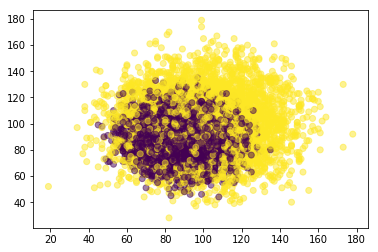

In [17]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,alpha=0.5)

In [18]:
y_train[:10]

6475    0
2220    0
2462    0
4551    0
6736    1
6217    1
5598    0
8236    1
6010    1
2521    1
Name: 是否潜在合约用户, dtype: int64

In [26]:
#生成模型训练评估函数
def modelfit(alg, X_train, y_train, performCV =True, printFeatureImportance =True, cv_folds=5):
    alg.fit(X_train, y_train)
    
    train_predictions = alg.predict(X_train)
    train_predprob = alg.predict_proba(X_train)[:,1]
    
    if performCV:
        cv_score =cross_val_score(alg, X_train, y_train, cv = cv_folds, scoring='roc_auc')
    print("\n Model Report")
    print("Accuracy (Train):%3.4f" % metrics.accuracy_score(y_train.values,train_predictions))
    print("AUC Score (Train):%f" % metrics.roc_auc_score(y_train,train_predprob))
    
    if performCV:
        print("CV Score :Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g"\
             % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,X_train.columns.tolist()).sort_values(ascending = True)
        feat_imp.plot(kind='barh', title = 'Feature Importances')
        plt.ylabel('Feature Importance Score')
        _ = plt.xlabel('Relative importance')

In [35]:
clf0.predict_proba(X_train)[:,1]

array([0.05171645, 0.0682083 , 0.07929569, ..., 0.99461086, 0.00797655,
       0.9975836 ])

In [27]:
#训练简单模型 作为baseline model
#模型实例化
clf0 = GradientBoostingClassifier(random_state=110)
clf0.fit(X_train, y_train)

#在测试集上预测
y_pred = clf0.predict(X_test)

#计算准确率
score = metrics.accuracy_score(y_test, y_pred)
print("The accuracy score of the model is :{0}".format(score))

#查看混淆矩阵
metrics.confusion_matrix(y_test, y_pred)

The accuracy score of the model is :0.9825


array([[1028,   10],
       [  25,  937]], dtype=int64)


 Model Report
Accuracy (Train):0.9862
AUC Score (Train):0.999099
CV Score :Mean - 0.9975603 | Std - 0.0004027038 | Min - 0.9969856 | Max - 0.9979951


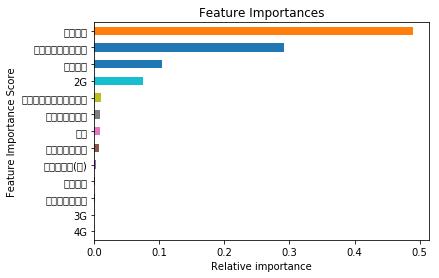

In [28]:
#简单模型评估
clf0 = GradientBoostingClassifier(random_state=110)
modelfit(clf0, X_train, y_train)

In [37]:
#GBDT调参
#1、调试迭代次数：n_estimators
#设置迭代次数的范围
param_test1 = {'n_estimators':range(20,81,10)}
estimator = GradientBoostingClassifier(learning_rate=0.2,min_samples_split=50,min_samples_leaf=5,
                                      max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
gsearch1= GridSearchCV(estimator,param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid= False,cv=5)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [39]:
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print(gsearch1.best_estimator_)

0.9980319708107752
{'n_estimators': 80}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [43]:
# 2、调试决策树的相关参数：max_features 和 min_samples_split
# 固定参数learning_rate=0.2,n_estimators=80,调试max_features和min_samples_split
param_test2 = {'max_depth':range(1,9,1),'min_samples_split':range(10,101,10)}
estimator = GradientBoostingClassifier(learning_rate=0.2,n_estimators=80,
                                     max_features='sqrt',subsample=0.8,random_state=10)
gsearch2= GridSearchCV(estimator,param_grid = param_test2,scoring='roc_auc',n_jobs=4,iid= False,cv=5)
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(10, 101, 10), 'max_depth': range(1, 9)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [44]:
print(gsearch2.best_score_)
print(gsearch2.best_params_)
print(gsearch2.best_estimator_)

0.9983572549633216
{'min_samples_split': 80, 'max_depth': 4}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [47]:
# 3、调试决策树的相关参数：min_samples_split 和 min_samples_leaf
# 固定参数learning_rate=0.2,n_estimators=70,调试max_features和min_samples_split
param_test3 = {'min_samples_split':range(90,201,20), 'min_samples_leaf':range(5,51,5)}
estimator = GradientBoostingClassifier(learning_rate=0.2,n_estimators=80,max_depth= 4,
                                     max_features='sqrt',subsample=0.8,random_state=10)
gsearch3= GridSearchCV(estimator,param_grid = param_test3,scoring='roc_auc',n_jobs=4,iid= False,cv=5)
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(90, 201, 20), 'min_samples_leaf': range(5, 51, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [48]:
print(gsearch3.best_score_)
print(gsearch3.best_params_)
print(gsearch3.best_estimator_)

0.998444417695865
{'min_samples_split': 130, 'min_samples_leaf': 5}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=130,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [50]:
# 4、调试决策树的相关参数：max_features
# 固定参数learning_rate=0.2,n_estimators=70,min_samples_split=130,min_samples_leaf=20
param_test4 = {'max_features':range(1,8,1)}
estimator = GradientBoostingClassifier(learning_rate=0.2,n_estimators=80,max_depth= 4
                                     ,min_samples_split=130,min_samples_leaf=5,
                                       subsample=0.8,random_state=10)
gsearch4= GridSearchCV(estimator,param_grid = param_test4,scoring='roc_auc',n_jobs=4,iid= False,cv=5)
gsearch4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(1, 8)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [51]:
print(gsearch4.best_score_)
print(gsearch4.best_params_)
print(gsearch4.best_estimator_)

0.9985286116205716
{'max_features': 1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=130,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [52]:
# 5、调试决策树的相关参数：Subsample
# 固定参数learning_rate=0.2,n_estimators=80,min_samples_split=130,min_samples_leaf=5,max_features=1
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
estimator = GradientBoostingClassifier(learning_rate=0.2,n_estimators=80,max_depth= 4
                                     ,min_samples_split=130,min_samples_leaf=5,max_features=1,
                                       random_state=10)
gsearch5= GridSearchCV(estimator,param_grid = param_test5,scoring='roc_auc',n_jobs=4,iid= False,cv=5)
gsearch5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [53]:
print(gsearch5.best_score_)
print(gsearch5.best_params_)
print(gsearch5.best_estimator_)

0.9985417062375456
{'subsample': 0.9}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=130,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)



 Model Report
Accuracy (Train):0.9926
AUC Score (Train):0.999519
CV Score :Mean - 0.9985063 | Std - 0.0003064448 | Min - 0.9979529 | Max - 0.9988452


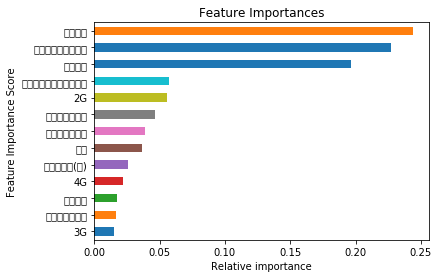

In [57]:
# 6、调试learning_rate 和n_estimator
# 固定参数learning_rate=0.2,n_estimators=80,min_samples_split=130,min_samples_leaf=5,max_features=1

gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=140,max_depth= 4
                                     ,min_samples_split=130,min_samples_leaf=5,max_features=1,
                                       subsample=0.9,random_state=10)

modelfit(gbm_tuned_1,X_train, y_train)


 Model Report
Accuracy (Train):0.9926
AUC Score (Train):0.999538
CV Score :Mean - 0.9985326 | Std - 0.00029399 | Min - 0.9980123 | Max - 0.9988905


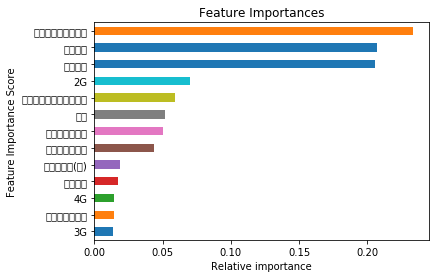

In [59]:
# learning_rate=0.05, n_estimators=210

gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=280,max_depth= 4
                                     ,min_samples_split=130,min_samples_leaf=5,max_features=1,
                                       subsample=0.9,random_state=10)

modelfit(gbm_tuned_2,X_train, y_train)


 Model Report
Accuracy (Train):0.9936
AUC Score (Train):0.999594
CV Score :Mean - 0.9985017 | Std - 0.0002976393 | Min - 0.9980186 | Max - 0.9989124


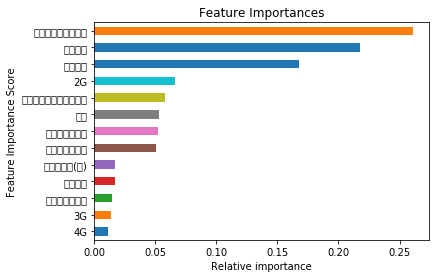

In [60]:
# learning_rate=0.01, n_estimators=1400

gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1400,max_depth= 4
                                     ,min_samples_split=130,min_samples_leaf=5,max_features=1,
                                       subsample=0.9,random_state=10)

modelfit(gbm_tuned_3,X_train, y_train)

In [79]:
#7、训练使用最优超参的模型
# learning_rate=0.01, n_estimators=1400

gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1400,max_depth= 4
                                     ,min_samples_split=130,min_samples_leaf=5,max_features=1,
                                       subsample=0.9,random_state=10)
#在训练集上训练模型
gbm_tuned_3.fit(X_train, y_train)
#在测试集上预测
y_pred = gbm_tuned_3.predict(X_test)
y_pred_proba = gbm_tuned_3.predict_proba(X_test)[:,1]

In [80]:
#计算准确率
score =metrics.accuracy_score(y_test, y_pred)
print("SCORE is {0}".format(score))
auc_score =metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC_SCORE is {0}".format(auc_score))

SCORE is 0.9875
AUC_SCORE is 0.9979780803480225


In [81]:
metrics.confusion_matrix(y_test, y_pred)

array([[1036,    2],
       [  23,  939]], dtype=int64)

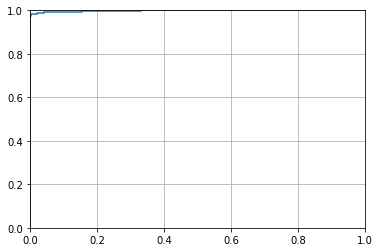

In [83]:
fpr, tpr, threholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(True)